## Assignment 3 (Amit Singh Bisht) student # 100881017

In [1]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load Dataset
dataset=pd.read_csv('Raisin_Dataset.csv')
dataset.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [3]:
count = dataset['Class'].value_counts()
count

Kecimen    450
Besni      450
Name: Class, dtype: int64

In [4]:
unique_values = dataset['Class'].unique()
unique_values

array(['Kecimen', 'Besni'], dtype=object)

In [5]:
#Create Profile Report
 
#Importing package
import pandas_profiling as pp
from IPython.display import IFrame
 
# Profile Report
Dataset_Report = pp.ProfileReport(dataset)
Dataset_Report.to_file('Raisin_dataset_report-lbfgs.html')
display(IFrame('Raisin_dataset_report-lbfgs.html', width=900, height=350))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
#Covariance test - Levene Test

#   p <= alpha(0.05): reject H0, not the same covariance.
#   p > alpha(0.05): fail to reject H0, same covariance.

import scipy.stats as stats
names=dataset.get('Class')

cnt=1
for col in dataset.columns:
    if (col=='Class'):
        continue
        
    stat, p = stats.levene(dataset[col][dataset['Class'] == names[0]], 
               dataset[col][dataset['Class'] == names[1]])

    print(col)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Covariance the Same (fail to reject H0)')
        print('\n')
    else:
        print('Covariance different(reject H0)')
        print('\n')
    cnt +=1    

Area
Statistics=0.000, p=1.000
Covariance the Same (fail to reject H0)


MajorAxisLength
Statistics=0.000, p=1.000
Covariance the Same (fail to reject H0)


MinorAxisLength
Statistics=0.000, p=1.000
Covariance the Same (fail to reject H0)


Eccentricity
Statistics=0.000, p=1.000
Covariance the Same (fail to reject H0)


ConvexArea
Statistics=0.000, p=1.000
Covariance the Same (fail to reject H0)


Extent
Statistics=0.000, p=1.000
Covariance the Same (fail to reject H0)


Perimeter
Statistics=0.000, p=1.000
Covariance the Same (fail to reject H0)




In [7]:
#Normality test - Shapiro-Wilk Test
# p <= alpha(0.05): reject H0, not normal.
# p > alpha(0.05): fail to reject H0, normal.

from scipy.stats import shapiro

cnt=1
for col in dataset.columns:
    if (col=='Class'):
        continue
        
    stat, p = shapiro(dataset[col])

    print(col)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
        print('\n')
    else:
        print('Sample does not look Gaussian (reject H0)')
        print('\n')
    cnt +=1    

Area
Statistics=0.906, p=0.000
Sample does not look Gaussian (reject H0)


MajorAxisLength
Statistics=0.942, p=0.000
Sample does not look Gaussian (reject H0)


MinorAxisLength
Statistics=0.965, p=0.000
Sample does not look Gaussian (reject H0)


Eccentricity
Statistics=0.913, p=0.000
Sample does not look Gaussian (reject H0)


ConvexArea
Statistics=0.902, p=0.000
Sample does not look Gaussian (reject H0)


Extent
Statistics=0.944, p=0.000
Sample does not look Gaussian (reject H0)


Perimeter
Statistics=0.945, p=0.000
Sample does not look Gaussian (reject H0)




In [8]:
#Create x and y variables
x = dataset.drop('Class', axis=1).to_numpy()
Y = dataset['Class'].to_numpy()

#Create Train and Test Dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size = 0.2,stratify=Y,random_state = 100)

#Fix the imbalanced Classes
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=100)
x_train_smt,y_train_smt = smt.fit_resample(x_train,y_train)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train_smt)
x_test2 = sc.transform(x_test)

#Models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [9]:
#Class Balance - Test Data
print('Train Data - Class Split')
num_zeros = (y_train_smt == 'Kecimen').sum()
num_ones = (y_train_smt == 'Besni').sum()
print('Kecimen -',  num_zeros)
print('Besni -',  num_ones)

Train Data - Class Split
Kecimen - 360
Besni - 360


In [10]:
#Base LDA, QDA and Logistical Regression Model
from sklearn.metrics import classification_report, confusion_matrix  

for name,method in [('LDA', LinearDiscriminantAnalysis()),('QDA',QuadraticDiscriminantAnalysis()),
                   ('LogReg',LogisticRegression(solver='lbfgs',
                                               class_weight='balanced',
                                               random_state=100))]: 
    method.fit(x_train2,y_train_smt)
    predict = method.predict(x_test2)
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict))         


Estimator: LDA
[[76 14]
 [12 78]]
              precision    recall  f1-score   support

       Besni       0.86      0.84      0.85        90
     Kecimen       0.85      0.87      0.86        90

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180


Estimator: QDA
[[73 17]
 [ 3 87]]
              precision    recall  f1-score   support

       Besni       0.96      0.81      0.88        90
     Kecimen       0.84      0.97      0.90        90

    accuracy                           0.89       180
   macro avg       0.90      0.89      0.89       180
weighted avg       0.90      0.89      0.89       180


Estimator: LogReg
[[76 14]
 [12 78]]
              precision    recall  f1-score   support

       Besni       0.86      0.84      0.85        90
     Kecimen       0.85      0.87      0.86        90

    accuracy                           0.86       180
   macro avg       0

In [11]:
#Construct some pipelines 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Create Pipeline

pipeline =[]

pipe_lda = Pipeline([('scl', StandardScaler()),
                    ('clf', LinearDiscriminantAnalysis())])
pipeline.insert(0,pipe_lda)

pipe_qda = Pipeline([('scl', StandardScaler()),
                    ('clf', QuadraticDiscriminantAnalysis())])
pipeline.insert(1,pipe_qda)

pipe_logreg = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(solver='lbfgs',
                                               class_weight='balanced',
                                               random_state=100))])   
pipeline.insert(2,pipe_logreg)
    
    
# Set grid search params 

modelpara =[]

param_gridlda = {'clf__solver':['svd','lsqr','eigen']}
modelpara.insert(0,param_gridlda)

param_gridqda = {}
modelpara.insert(1,param_gridqda)

param_gridlogreg = {'clf__C': [0.01, 0.1, 1, 10, 100], 
                    'clf__penalty': ['l2']}
modelpara.insert(2,param_gridlogreg)

In [12]:
#Define Plot for learning curve

from sklearn.model_selection import learning_curve

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=x_train_smt, 
                                                            y=y_train_smt,
                                                            train_sizes= np.linspace(0.1, 1.0, 10),
                                                            cv=10,
                                                            scoring='recall_weighted',random_state=100)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean,color='blue', marker='o', 
             markersize=5, label='training recall')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation recall')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid(True)
    plt.xlabel('Number of training samples')
    plt.ylabel('Recall')
    plt.legend(loc='best')
    plt.ylim([0.5, 1.0])
    plt.show()

LDA Learning Curve


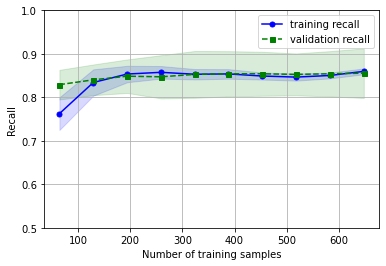


 QDA Learning Curve


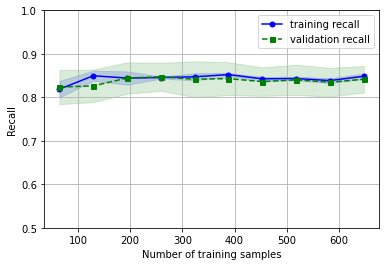


 Logistic Regression Learning Curve


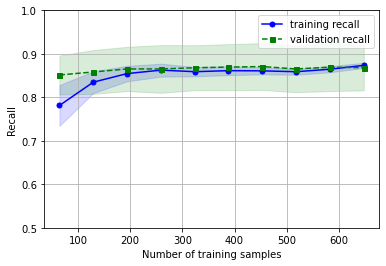

In [13]:
#Plot Learning Curve
print('LDA Learning Curve')
plot_learning_curves(pipe_lda)
print('\n QDA Learning Curve')
plot_learning_curves(pipe_qda)
print('\n Logistic Regression Learning Curve')
plot_learning_curves(pipe_logreg)

Model Evaluation - Recall Score
LDA 0.86 +/- 0.04
QDA 0.84 +/- 0.03
Log Reg 0.87 +/- 0.04




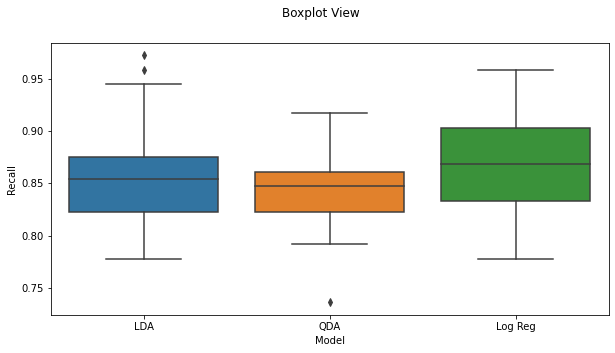

In [14]:
#Model Analysis
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

models=[]
models.append(('LDA',pipe_lda))
models.append(('QDA',pipe_qda))
models.append(('Log Reg',pipe_logreg))

#Model Evaluation
results =[]
names=[]
scoring ='recall_weighted'
print('Model Evaluation - Recall Score')
for name, model in models:
    rkf=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    cv_results = cross_val_score(model,x_train_smt,y_train_smt,cv=rkf,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('{} {:.2f} +/- {:.2f}'.format(name,cv_results.mean(),cv_results.std()))
print('\n') 

fig = plt.figure(figsize=(10,5))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.ylabel('Recall')
plt.xlabel('Model')
plt.show()

In [15]:
#Define Gridsearch Function

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix  

def Gridsearch_cv(model, params):
    
    #Cross-validation Function
    cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
        
    #GridSearch CV
    gs_clf = GridSearchCV(model, params, cv=cv2,scoring='recall_weighted')
    gs_clf = gs_clf.fit(x_train_smt, y_train_smt)
    model = gs_clf.best_estimator_
    
    # Use best model and test data for final evaluation
    y_pred = model.predict(x_test)

    #Identify Best Parameters to Optimize the Model
    bestpara=str(gs_clf.best_params_)
    
    #Output Validation Statistics
    target_names=['Outcome Kecimen','Outcome Besni']
    print('\nOptimized Model')
    print('\nModel Name:',str(pipeline.named_steps['clf']))
    print('\nBest Parameters:',bestpara)
    print('\n', confusion_matrix(y_test,y_pred))  
    print('\n',classification_report(y_test,y_pred,target_names=target_names)) 
        
    #Transform the variables into binary (0,1) - ROC Curve
    from sklearn import preprocessing
    Forecast1=pd.DataFrame(y_pred)
    Outcome1=pd.DataFrame(y_test)
    lb1 = preprocessing.LabelBinarizer()
    OutcomeB1 =lb1.fit_transform(Outcome1)
    ForecastB1 = lb1.fit_transform(Forecast1)
    
    #Setup the ROC Curve
    from sklearn.metrics import roc_curve, auc
    from sklearn import metrics
    fpr, tpr, threshold = metrics.roc_curve(OutcomeB1, ForecastB1)
    roc_auc = metrics.auc(fpr, tpr)
    print('ROC Curve')
    #Plot the ROC Curve
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()   


Optimized Model

Model Name: LinearDiscriminantAnalysis()

Best Parameters: {'clf__solver': 'svd'}

 [[76 14]
 [12 78]]

                  precision    recall  f1-score   support

Outcome Kecimen       0.86      0.84      0.85        90
  Outcome Besni       0.85      0.87      0.86        90

       accuracy                           0.86       180
      macro avg       0.86      0.86      0.86       180
   weighted avg       0.86      0.86      0.86       180

ROC Curve


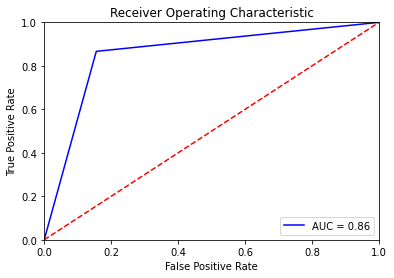


Optimized Model

Model Name: QuadraticDiscriminantAnalysis()

Best Parameters: {}

 [[73 17]
 [ 3 87]]

                  precision    recall  f1-score   support

Outcome Kecimen       0.96      0.81      0.88        90
  Outcome Besni       0.84      0.97      0.90        90

       accuracy                           0.89       180
      macro avg       0.90      0.89      0.89       180
   weighted avg       0.90      0.89      0.89       180

ROC Curve


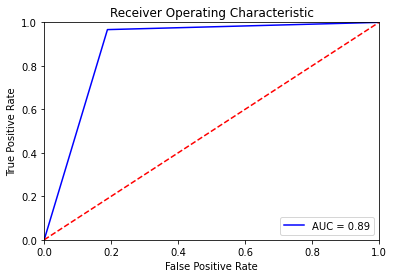


Optimized Model

Model Name: LogisticRegression(class_weight='balanced', random_state=100)

Best Parameters: {'clf__C': 0.01, 'clf__penalty': 'l2'}

 [[73 17]
 [12 78]]

                  precision    recall  f1-score   support

Outcome Kecimen       0.86      0.81      0.83        90
  Outcome Besni       0.82      0.87      0.84        90

       accuracy                           0.84       180
      macro avg       0.84      0.84      0.84       180
   weighted avg       0.84      0.84      0.84       180

ROC Curve


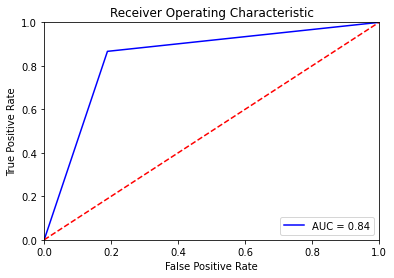

In [16]:
#Run Models

for pipeline, modelpara in zip(pipeline,modelpara):
    Gridsearch_cv(pipeline,modelpara)